In [1]:
import os
import json
from collections import defaultdict
from collections import Counter
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
RESULTS = '../results/fashion'

In [3]:
gemini = json.load(open(f'{RESULTS}/0_179_gemini.json'))

In [4]:
gemini[0]

{'image_1': 'adj_obj_folder_pairs_images/val/frayed_jacket-quilted_jacket/frayed_jacket/33a60f6f6d0abe76697705b61564ad30.jpg',
 'image_2': 'adj_obj_folder_pairs_images/val/frayed_jacket-quilted_jacket/quilted_jacket/124dc5471306edcadc0d89bfc7353939.jpg',
 'answer': 'Left',
 'question': 'Which jacket is more frayed?',
 'gemini_answer': ' Second'}

In [8]:
gpt = json.load(open(f'{RESULTS}/0_179_gpt.json'))

In [11]:
llava = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/0_179_llava.jsonl'), "r")]

In [4]:
vila = [json.loads(q) for q in open(os.path.expanduser(f'{RESULTS}/0_179_vila.jsonl'), "r")]

In [7]:
len(gpt)

2435

In [8]:
len(gemini)

2435

In [5]:
len(vila)

2435

# sanity check

In [9]:
error = []
refine = []
rerun = []
for pair in gpt:
    new = deepcopy(pair)
    if pair['gpt_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['gpt_answer']:
        new['gpt_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['gpt_answer']:
        new['gpt_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

{'image_1': 'adj_obj_folder_pairs_images/val/distressed_shorts-plain (pattern)_shorts/distressed_shorts/cf7bd43e4005602bc0ba4e2b5763e3a0.jpg', 'image_2': 'adj_obj_folder_pairs_images/val/distressed_shorts-plain (pattern)_shorts/plain (pattern)_shorts/9c2944165b3d4390a3aa62dc0a07fe7e.jpg', 'answer': 'Left', 'question': 'Which shorts are more distressed', 'gpt_answer': 'GPT error'}


In [10]:
len(refine)

2434

In [11]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gpt_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gpt_answer']:
            correct.append(pair)
            correct_pred.append(pair['gpt_answer'])
    elif pair['answer'] != pair['gpt_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gpt_answer'])
    else:
        print('fuck')

In [12]:
len(correct) / (len(correct) + len(wrong))

0.8841413311421529

In [13]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 1250, 'Left': 1184})

In [14]:
len(gpt)

2435

In [15]:
len(error)

1

In [16]:
(len(correct) + len(wrong))

2434

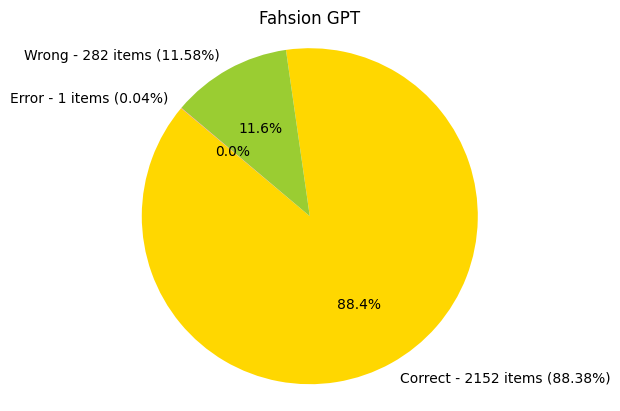

In [17]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fahsion GPT')
plt.show()

# Geimini

In [18]:
gemini[0]

{'image_1': 'adj_obj_folder_pairs_images/val/frayed_jacket-quilted_jacket/frayed_jacket/33a60f6f6d0abe76697705b61564ad30.jpg',
 'image_2': 'adj_obj_folder_pairs_images/val/frayed_jacket-quilted_jacket/quilted_jacket/124dc5471306edcadc0d89bfc7353939.jpg',
 'answer': 'Left',
 'question': 'Which jacket is more frayed?',
 'gemini_answer': ' Second'}

In [19]:
error = []
refine = []
for pair in gemini:
    new = deepcopy(pair)
    if 'First' in pair['gemini_answer']:
        new['gemini_answer'] = 'Left'
        refine.append(new)
    elif 'Second' in pair['gemini_answer']:
        new['gemini_answer'] = 'Right'
        refine.append(new)
    else:
        error.append(pair)
        #refine.append(pair)
        print(pair)
        

{'image_1': 'adj_obj_folder_pairs_images/val/frayed_pants-floral_pants/frayed_pants/80b493e0dccaca4fcb11fe5d81c47e83.jpg', 'image_2': 'adj_obj_folder_pairs_images/val/frayed_pants-floral_pants/floral_pants/72a138c47a27759553ebb2b2c1a94707.jpg', 'answer': 'Left', 'question': 'Which pants are more frayed?', 'gemini_answer': 'Gemini Error'}
{'image_1': 'adj_obj_folder_pairs_images/val/frayed_pants-floral_pants/frayed_pants/80b493e0dccaca4fcb11fe5d81c47e83.jpg', 'image_2': 'adj_obj_folder_pairs_images/val/frayed_pants-floral_pants/floral_pants/4872c05863d20208e9d4c59587261de2.jpg', 'answer': 'Right', 'question': 'Which pants are more floral?', 'gemini_answer': 'Gemini Error'}


In [20]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['gemini_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['gemini_answer']:
            correct.append(pair)
            correct_pred.append(pair['gemini_answer'])
    elif pair['answer'] != pair['gemini_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['gemini_answer'])
    else:
        print('fuck')

In [21]:
Counter(correct_pred+wrong_pred)

Counter({'Right': 1236, 'Left': 1197})

In [22]:
len(correct) / (len(correct) + len(wrong))

0.7529798602548294

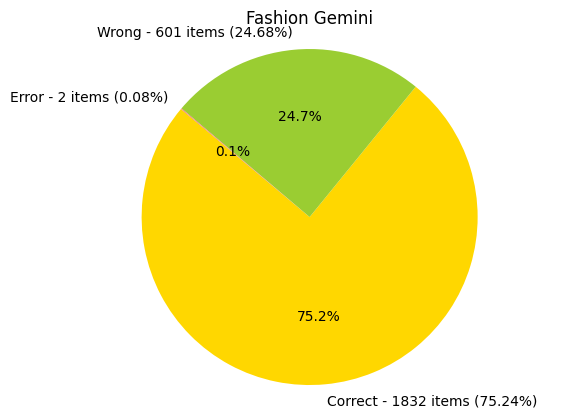

In [23]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fashion Gemini')
plt.show()

In [39]:
len(state_correct) / (len(state_correct) + len(state_wrong))

0.803030303030303

In [40]:
len(att_correct) / (len(att_correct) + len(att_wong))

0.7103825136612022

In [41]:
(len(att_correct) + len(att_wong))

183

In [42]:
(len(state_correct) + len(state_wrong))

594

# LLaVA-1.6

In [13]:
error = []
refine = []
rerun = []
for pair in llava:
    new = deepcopy(pair)
    if pair['llava_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['llava_answer']:
        new['llava_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['llava_answer']:
        new['llava_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

In [14]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['llava_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['llava_answer']:
            correct.append(pair)
            correct_pred.append(pair['llava_answer'])
    elif pair['answer'] != pair['llava_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['llava_answer'])
    else:
        print('fuck')

In [15]:
len(correct) / (len(correct) + len(wrong))

0.7162217659137577

In [16]:
Counter(wrong_pred+correct_pred)

Counter({'Right': 1351, 'Left': 1084})

In [17]:
len(llava)

2435

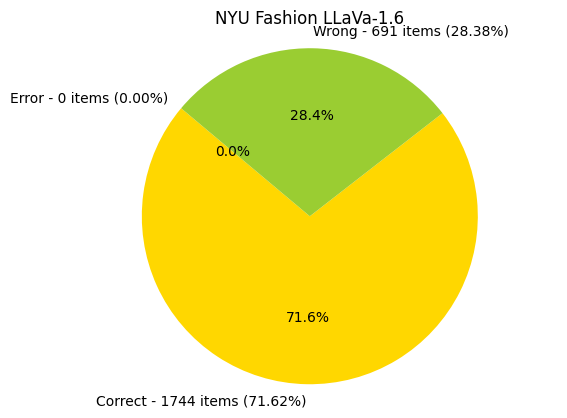

In [18]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('NYU Fashion LLaVa-1.6')
plt.show()

# Vila1.5

In [6]:
error = []
refine = []
rerun = []
for pair in vila:
    new = deepcopy(pair)
    if pair['vila_answer'] == None :
        rerun.append(pair)
    elif 'Right' in pair['vila_answer']:
        new['vila_answer'] = 'Right'
        refine.append(new)
    elif 'Left' in pair['vila_answer']:
        new['vila_answer'] = 'Left'
        refine.append(new)
    else:
        error.append(pair)
        print(pair)
        

In [7]:
#error = []
correct_pred = []
wrong_pred = []
gt = []
correct = []
wrong = []

for pair in refine:
    gt.append(pair['answer'])
    # if pair['vila_answer'] not in ('Left', "Right"):
    #     # print(pair)
    #     error.append(pair)
    #     continue
    if pair['answer'] == pair['vila_answer']:
            correct.append(pair)
            correct_pred.append(pair['vila_answer'])
    elif pair['answer'] != pair['vila_answer']:
            wrong.append(pair)
            wrong_pred.append(pair['vila_answer'])
    else:
        print('fuck')

In [8]:
len(correct) / (len(correct) + len(wrong))

0.6620123203285421

In [9]:
Counter(wrong_pred+correct_pred)

Counter({'Left': 1978, 'Right': 457})

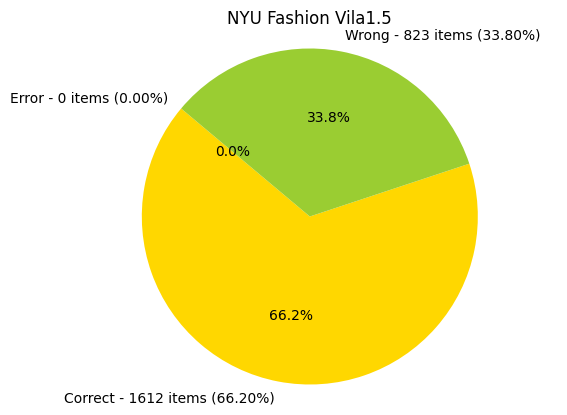

In [10]:
sizes = [len(correct), len(wrong), len(error)]
# Labels with percentages and exact counts
labels = [f'Correct - {sizes[0]} items ({sizes[0]/sum(sizes)*100:.2f}%)',
          f'Wrong - {sizes[1]} items ({sizes[1]/sum(sizes)*100:.2f}%)', 
         f'Error - {sizes[2]} items ({sizes[2]/sum(sizes)*100:.2f}%)', 
         ]

# Colors for each section
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('NYU Fashion Vila1.5')
plt.show()